In [21]:
import numpy as np
from scipy.integrate import odeint
# import matplotlib.pyplot as plt
from matplotlib import pyplot as PLT

In [12]:
#function that returns dy/dt
def model(z,t,co):
    # Initial conditions
    N = z[0]
    T = z[1]
    I = z[2]
    
    # Constant Values
    beta = co[0]
    mu =co[1]
    delta_N = co[2]   
    a = co[3]
    delta_T = co[4]
    s = co[5]
    e_T = co[6]
    delta_I = co[7]
    
    dNdt = beta*N - mu*N - delta_N*N
    dTdt = mu*N + a*I - delta_T*T
    dIdt = s*T - e_T*I*T - delta_I*I
    
    return [dNdt, dTdt, dIdt]

In [61]:
# initial condition
z0 = [10,66,0.5]
#Constant values [0-ThyNaive, 1-NaiveTo, 2-delta_N, 3-IL-2, 4-delta_T, 5-TtoIL2, 6-e_T, 7-delta_I]
#Constant values co = [0-beta, 1-mu, 2-delta_N, 3-a, 4-delta_T(b), 5-s(d) , 6-e_T(e), 7-delta_I(f)]
# co = [4, 2, 0.4,0.4,0.1,0.01,0.01,1]
co = [1, 2, 0.4,0.4,0.1,0.01,0.01,1]
# co = [1, 0.25, 0.2,0.4,0.1,0.005,0.01,1]
# time points
t = np.linspace(0,10)

# solve ODE
z = odeint(model,z0,t, args=(co,))

N = z[:,0]
T = z[:,1]
I = z[:,2]

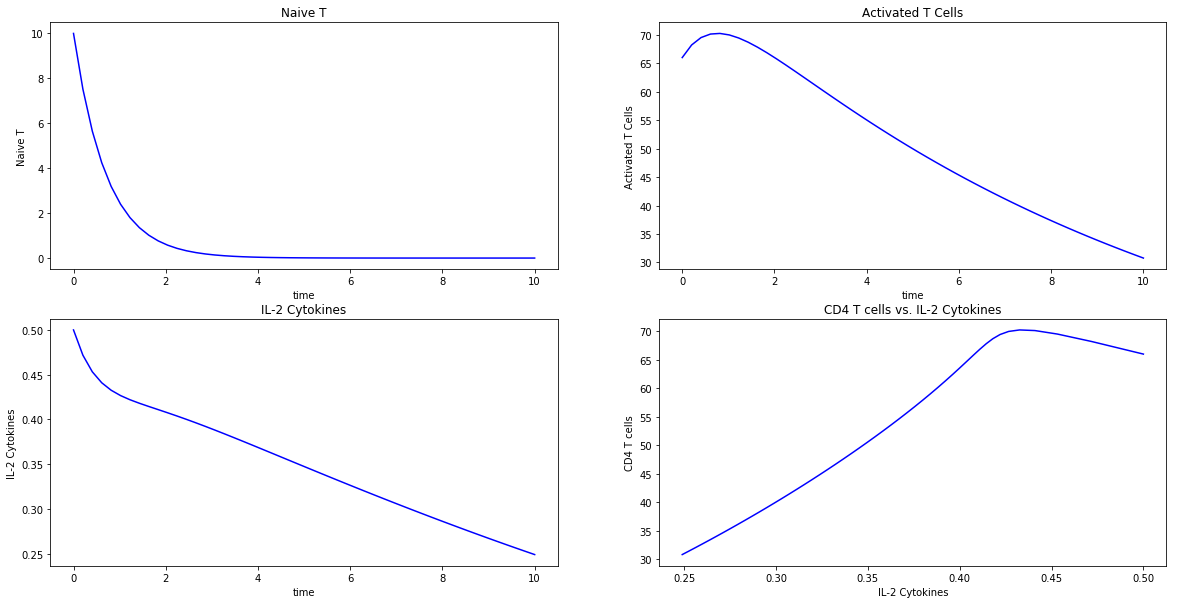

In [62]:
fig = PLT.figure(figsize=(20,10))

ax1 = fig.add_subplot(221)
ax1.plot(t,N, 'b-')
ax1.set_xlabel('time')
ax1.set_ylabel('Naive T')
ax1.set_title('Naive T')

ax2 = fig.add_subplot(222)
ax2.plot(t,T,'b-')
ax2.set_xlabel('time')
ax2.set_ylabel('Activated T Cells')
ax2.set_title('Activated T Cells')


ax3 = fig.add_subplot(223)
ax3.plot(t,I,'b-')
ax3.set_xlabel('time')
ax3.set_ylabel('IL-2 Cytokines')
ax3.set_title('IL-2 Cytokines')

ax4 = fig.add_subplot(224)
ax4.plot(I,T,'b-')
ax4.set_xlabel('IL-2 Cytokines')
ax4.set_ylabel('CD4 T cells')
ax4.set_title('CD4 T cells vs. IL-2 Cytokines')

PLT.show()